In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

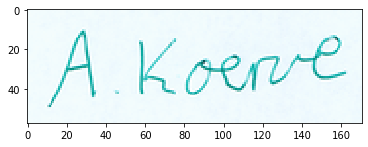

In [6]:
import matplotlib.pyplot as plt
img = plt.imread('input/sample_Signature/sample_Signature/forged/NFI-00101014.png')
plt.imshow(img)

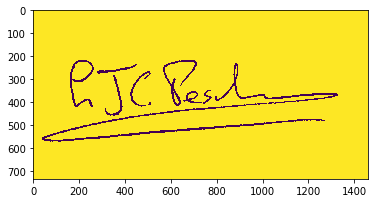

In [7]:
img1 = plt.imread('input/sample_Signature/sample_Signature/genuine/NFI-00101001.png')
plt.imshow(img1)

In [8]:
import glob
gen = [glob.glob('input/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
       glob.glob('input/Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
       glob.glob('input/Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
       glob.glob('input/Dataset_Signature_Final/Dataset/dataset4/real1/*.*')]
                 
forg = [glob.glob('input/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('input/Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('input/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('input/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]
print(gen)

[['input/Dataset_Signature_Final/Dataset/dataset1/real\\00100001.png', 'input/Dataset_Signature_Final/Dataset/dataset1/real\\00101001.png', 'input/Dataset_Signature_Final/Dataset/dataset1/real\\00102001.png', 'input/Dataset_Signature_Final/Dataset/dataset1/real\\00103001.png', 'input/Dataset_Signature_Final/Dataset/dataset1/real\\00104001.png', 'input/Dataset_Signature_Final/Dataset/dataset1/real\\00200002.png', 'input/Dataset_Signature_Final/Dataset/dataset1/real\\00201002.png', 'input/Dataset_Signature_Final/Dataset/dataset1/real\\00202002.png', 'input/Dataset_Signature_Final/Dataset/dataset1/real\\00203002.png', 'input/Dataset_Signature_Final/Dataset/dataset1/real\\00204002.png', 'input/Dataset_Signature_Final/Dataset/dataset1/real\\00300003.png', 'input/Dataset_Signature_Final/Dataset/dataset1/real\\00301003.png', 'input/Dataset_Signature_Final/Dataset/dataset1/real\\00302003.png', 'input/Dataset_Signature_Final/Dataset/dataset1/real\\00303003.png', 'input/Dataset_Signature_Final/D

In [44]:
import glob
import keras
import cv2


train_data = []
train_labels = []

test_data = []
test_labels = []

for data in range(len(gen)):
    for i in gen[data]:
        if data == 3:
            image = cv2.imread(i)
            
            
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            
            test_data.append(image)
            test_labels.append(0)
        else:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(0) #genuine = 0
        
for data in range(len(forg)):
    for j in forg[data]:
        if data == 3:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(1)
        else:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(1) #forged = 1

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)


In [45]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [35]:
train_data.shape

(540, 224, 224, 3)

In [47]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam

network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
network.add(MaxPooling2D(3,3))
network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(2,2))
network.add(Flatten())
network.add(Dense(128,activation = 'relu'))
network.add(Dropout(rate=0.3))
network.add(Dense(2,activation = 'softmax'))

network.compile(optimizer=Adam(lr=0.00001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               5308544   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [48]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 5
BS = 1
progess = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/5
513/513 [==============================] - 56s 109ms/step - loss: 0.6946 - accuracy: 0.5244 - val_loss: 0.6932 - val_accuracy: 0.2593
Epoch 2/5
513/513 [==============================] - 56s 108ms/step - loss: 0.6932 - accuracy: 0.5029 - val_loss: 0.6931 - val_accuracy: 0.6296
Epoch 3/5
513/513 [==============================] - 53s 103ms/step - loss: 0.6931 - accuracy: 0.5380 - val_loss: 0.6931 - val_accuracy: 0.4444
Epoch 4/5
513/513 [==============================] - 53s 104ms/step - loss: 0.6931 - accuracy: 0.5302 - val_loss: 0.6931 - val_accuracy: 0.4815
Epoch 5/5
513/513 [==============================] - 53s 103ms/step - loss: 0.6931 - accuracy: 0.5380 - val_loss: 0.6931 - val_accuracy: 0.5926


In [63]:
predictions=(network.predict_classes(test_data))
print(predictions)

[0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0
 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1
 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1
 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0]


In [64]:
type(test_labels)


numpy.ndarray

In [65]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [66]:
print(classification_report(test_labels,predictions))

              precision    recall  f1-score   support

           0       0.42      0.33      0.37        90
           1       0.44      0.53      0.48        90

    accuracy                           0.43       180
   macro avg       0.43      0.43      0.43       180
weighted avg       0.43      0.43      0.43       180



In [67]:
print(confusion_matrix(test_labels,predictions))

[[30 60]
 [42 48]]


In [60]:
from keras.models import load_model

In [61]:
network.save('my_model1.h5')

In [62]:
later_model=load_model('my_model1.h5')